In [ ]:
from audIBle.data.datasets import ESC_50

In [ ]:
root = "/lium/corpus/vrac/tmario/"
dataset = ESC_50(root=root, part='train')

In [ ]:
import torch
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
for i, (audio, target) in enumerate(data_loader):
    print(audio.shape)
    print(target.shape)
    break

In [ ]:
from audIBle.data.datasets import UrbanSound8k
import os
import torch
root = "/lium/corpus/vrac/tmario/sed/urbansound8k/urbansound8k/"
dataset = UrbanSound8k(csv_path=os.path.join(root, "metadata/UrbanSound8K.csv"),
                           audio_dir=os.path.join(root, "audio"),
                           sample_rate=22050,
                           folds_to_use=[1,2,3,4,5],
                           duration=4.0,)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
for i, (audio, target) in enumerate(data_loader):
    print(audio.shape)
    print(target.shape)
    break

In [ ]:
import torch
a = []
for i in range(10):
    a.append(torch.randn((1,)))

a_s = torch.stack(a).mean(dim=0)
print(a_s.shape)



In [ ]:
ll = [1,3,4,7]
print('_'.join(str(i) for i in ll))

In [ ]:
import torch
all_rep = []
for k in range(10):
    y = torch.randn(64,356,768)
    y_pool = y.mean(dim=1)
    all_rep.append(y_pool)

y_st = torch.stack(all_rep, dim=1)
y_ct = torch.cat(all_rep)

print(f"{y_st.shape=}\n{y_ct.shape=}")


In [ ]:
from datasets import load_dataset,Audio
timit = load_dataset("timit_asr", data_dir="/lium/corpus/vrac/tmario/timit/TIMIT")

In [1]:
# Example usage
from audIBle.data.speech import TimitDataset
data_dir = "/lium/corpus/base/TIMIT"  # Replace with your TIMIT path

# Create datasets
train_dataset = TimitDataset(data_dir, split="train", samplerate=16000, length=0.5)
test_dataset = TimitDataset(data_dir, split="test", samplerate=16000, length=0.5)


/lium/buster1/tmario/miniconda3/envs/sae_audio/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/export/home/lium/tmario/src/Aud-IB-le/audIBle/data/speech.py:13: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


Loading train data from /lium/corpus/base/TIMIT/train
Found 4620 audio files
Successfully loaded 177080 phoneme segments
Loading test data from /lium/corpus/base/TIMIT/test
Found 1680 audio files
Successfully loaded 64145 phoneme segments


In [2]:

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# Get phoneme statistics
train_phonemes = train_dataset.get_phoneme_counts()
print(f"Number of unique phonemes in train: {len(train_phonemes)}")
print("Top 10 most frequent phonemes:")
sorted_phonemes = sorted(train_phonemes.items(), key=lambda x: x[1], reverse=True)
for phoneme, count in sorted_phonemes[:10]:
    print(f"  {phoneme}: {count}")


Train dataset size: 177080
Test dataset size: 64145
Number of unique phonemes in train: 61
Top 10 most frequent phonemes:
  h#: 9240
  ix: 8642
  s: 7475
  n: 7068
  iy: 6953
  tcl: 6644
  r: 6539
  kcl: 5859
  l: 5801
  ih: 5051


In [3]:

# Test a sample
idx=3
audio, label = train_dataset[idx]
print(f"Sample audio shape: {audio.shape}")
print(f"Sample label: {label}")
print(f"Sample phoneme: {train_dataset.phone_segments[idx]['phoneme']}")


Sample audio shape: torch.Size([8000])
Sample label: 19
Sample phoneme: nx


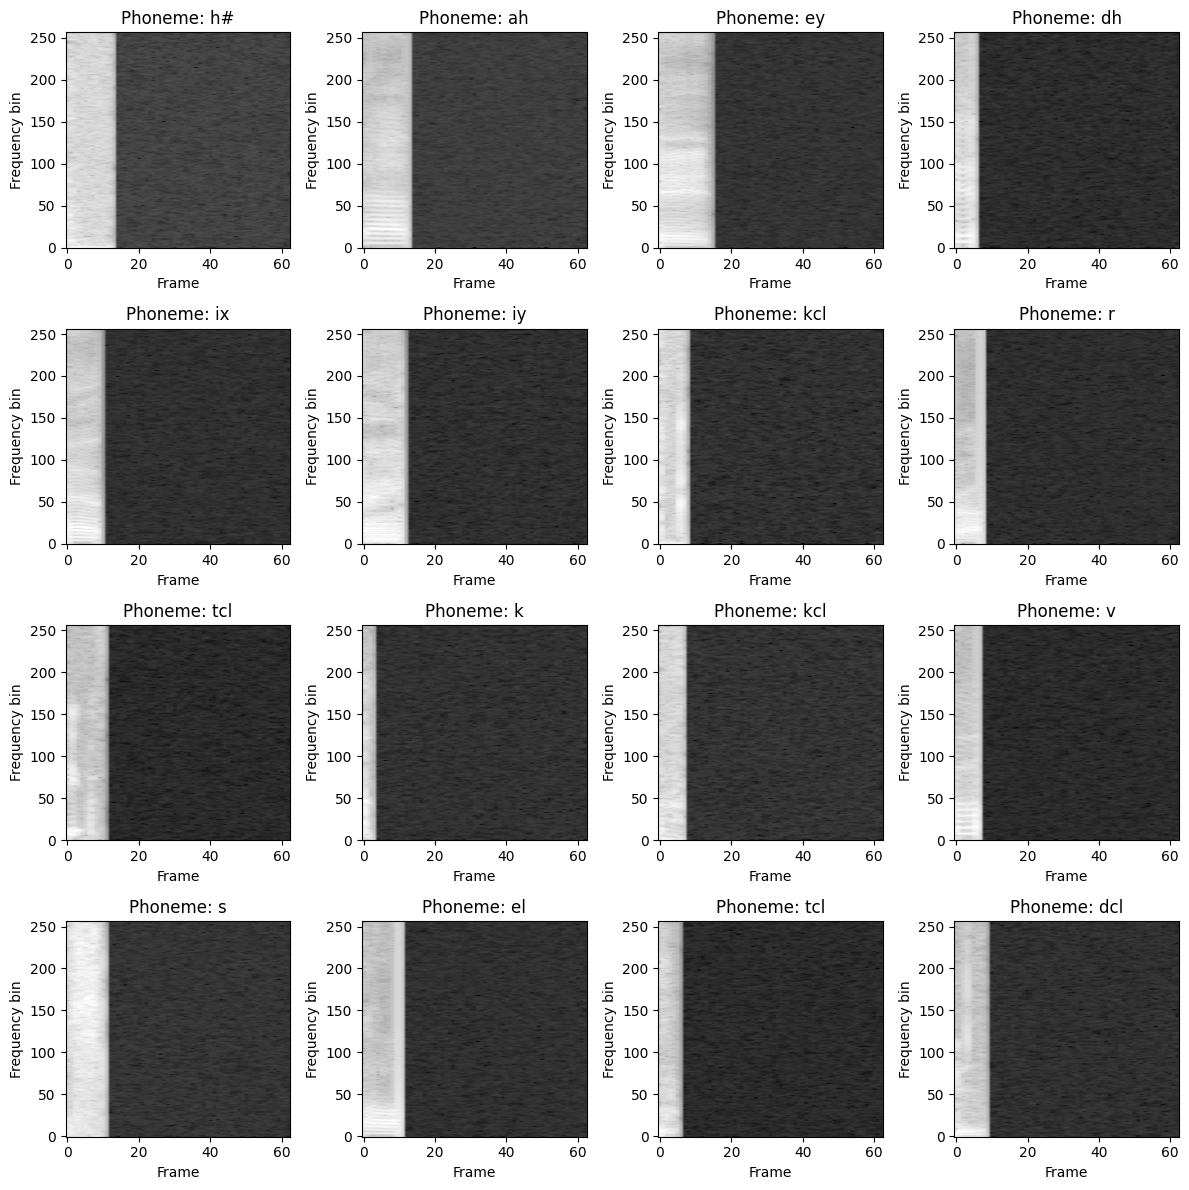

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
nr = 4
nc = 4

import torchaudio

spec_transform = torchaudio.transforms.Spectrogram(n_fft=512, win_length=512, hop_length=128, power=2)

fig, axs = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 12))
for ax, idx in zip(axs.flat, np.random.choice(len(train_dataset), size=(nr*nc,), replace=False)):
    audio, label = train_dataset[idx]
    nn = torch.randn_like(audio) * 1e-6
    audio = audio + nn
    # Compute spectrogram using torchaudio transform
    S = spec_transform(audio.float())
    ax.imshow(10 * torch.log10(S).numpy(), aspect='auto', origin='lower', cmap='gray')
    ax.set_title(f"Phoneme: {train_dataset.phone_segments[idx]['phoneme']}")
    ax.set_xlabel("Frame")
    ax.set_ylabel("Frequency bin")
plt.tight_layout()
plt.show()




### Test dataset wrapper

In [1]:
from audIBle.data.datasets import select_dataset
data_dir = "/lium/corpus/base/TIMIT"
cfg = {"data_dir":data_dir,"split": "train", "subsplit": "train", "samplerate": 16000, "length": 0.5}
dataset = select_dataset(dataset_name="timit", **cfg)

/lium/buster1/tmario/miniconda3/envs/sae_audio/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading train data from /lium/corpus/base/TIMIT/train
Found 4620 total audio files
Creating new train/valid split with ratio 0.8
Saved train/valid split to /lium/corpus/base/TIMIT/train_train_files.json and /lium/corpus/base/TIMIT/train_valid_files.json
Created split: 3696 train files, 924 valid files
Using 3696 files for training
Successfully loaded 141901 phoneme segments


In [2]:
cfg = {"data_dir":data_dir,"split": "train", "subsplit": "valid", "samplerate": 16000, "length": 0.5}
dataset = select_dataset(dataset_name="timit", **cfg)

Loading train data from /lium/corpus/base/TIMIT/train
Found 4620 total audio files
Loading existing train/valid split from /lium/corpus/base/TIMIT/train_train_files.json and /lium/corpus/base/TIMIT/train_valid_files.json
Loaded 3696 train files and 924 valid files
Using 924 files for validation
Successfully loaded 35179 phoneme segments


In [9]:
cfg = {"data_dir":data_dir,"split": "test", "samplerate": 16000, "length": 0.5}
dataset = select_dataset(dataset_name="timit", **cfg)

Loading test data from /lium/corpus/base/TIMIT/test
Found 1680 audio files
Successfully loaded 64145 phoneme segments
